# Goal: 
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#pip install pydotplus
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn import metrics
#from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus
#import graphviz

In [2]:
BankData = pd.read_csv("bank-full.csv")
BankData.head(10) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## 1. Univariate analysis (12 marks)

### a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

In [3]:
BankData.shape

(45211, 17)

In [4]:
BankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


In [5]:
BankData.info()
#object data types will have to be transformed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
BankData.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


In [7]:
BankData.isnull().values.any()
#no null values in the data

False

In [8]:
BankData.nunique() 
# Number of unique values in a column

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

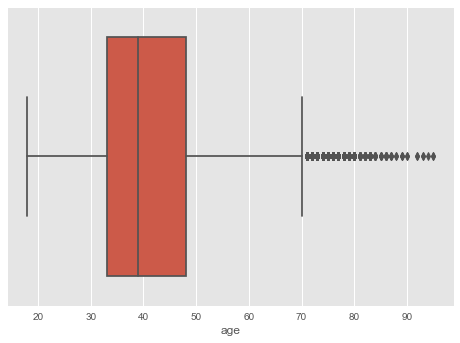

In [9]:
#These next plots are to check for outliers in the data
sns.boxplot(x=BankData["age"])

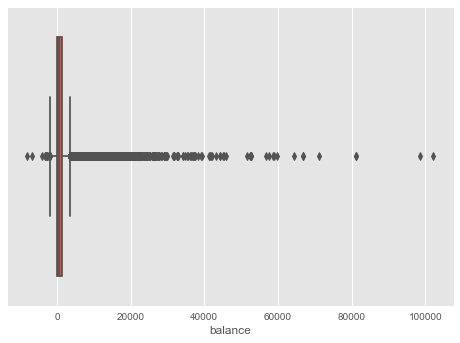

In [10]:
sns.boxplot(x=BankData["balance"])

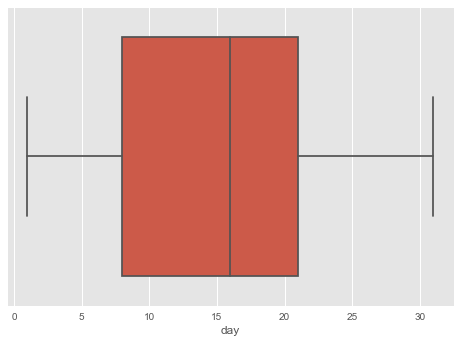

In [11]:
sns.boxplot(x=BankData["day"])

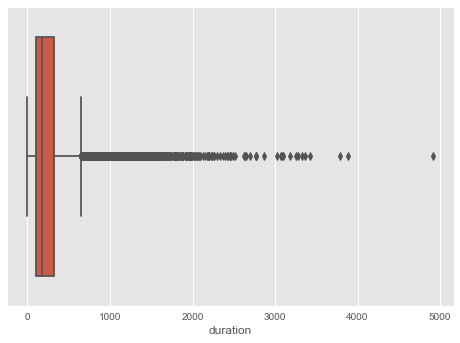

In [12]:
sns.boxplot(x=BankData["duration"])

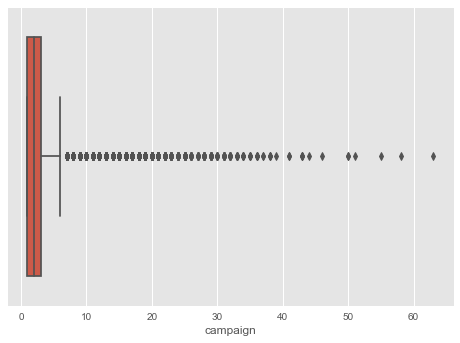

In [13]:
sns.boxplot(x=BankData["campaign"])

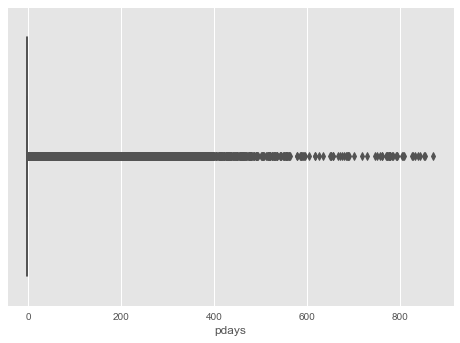

In [14]:
sns.boxplot(x=BankData["pdays"])

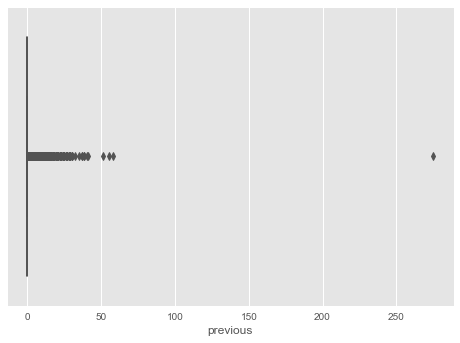

In [15]:
sns.boxplot(x=BankData["previous"])

In [16]:
#Checking for null values in the data
pd.DataFrame( BankData.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [17]:
#students seem to have a higher subscription rate
pd.crosstab(BankData['job'],BankData['Target'],normalize='index')

Target,no,yes
job,,
admin.,0.88,0.12
blue-collar,0.93,0.07
entrepreneur,0.92,0.08
housemaid,0.91,0.09
management,0.86,0.14
retired,0.77,0.23
self-employed,0.88,0.12
services,0.91,0.09
student,0.71,0.29


In [18]:
pd.crosstab(BankData['poutcome'],BankData['Target'],normalize='index')

Target,no,yes
poutcome,,
failure,0.87,0.13
other,0.83,0.17
success,0.35,0.65
unknown,0.91,0.09


In [19]:
pd.crosstab(BankData['marital'],BankData['Target'],normalize='index')

Target,no,yes
marital,,
divorced,0.88,0.12
married,0.90,0.10
single,0.85,0.15


The crosstab analysis does not seem to provide to show to a statistically significant correlation

### b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

Based on the data above the are several challenges with the dataset:
1. There are object datatypes that will have to be transformed
2. We need to convert yes and no in 'housing', 'loan', 'default', 'target' into 0 and 1. 
3. Month needs to be converted into a number format
4. We need dummy variables for 'marital', 'education', 'contact', 'poutcome', 'job'
5. Lastly we need to normalize the data, even though a some of the data looks like an outlier specially in balance it is still important for the analsys. This is why the data will have to be normalized instead of replacing what looks like outliers with the mean. 

### c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

This first section was mostly exploratory data analysis, it consisted of revising data and identifying what data needs to be treated in order to make a functional model. From the boxplots created in this first section it can be inferred that there is a lot of data that seems to be skewed but its still valuable data that needs to be normalized. 

## 2. Multivariate analysis (8 marks)

### a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

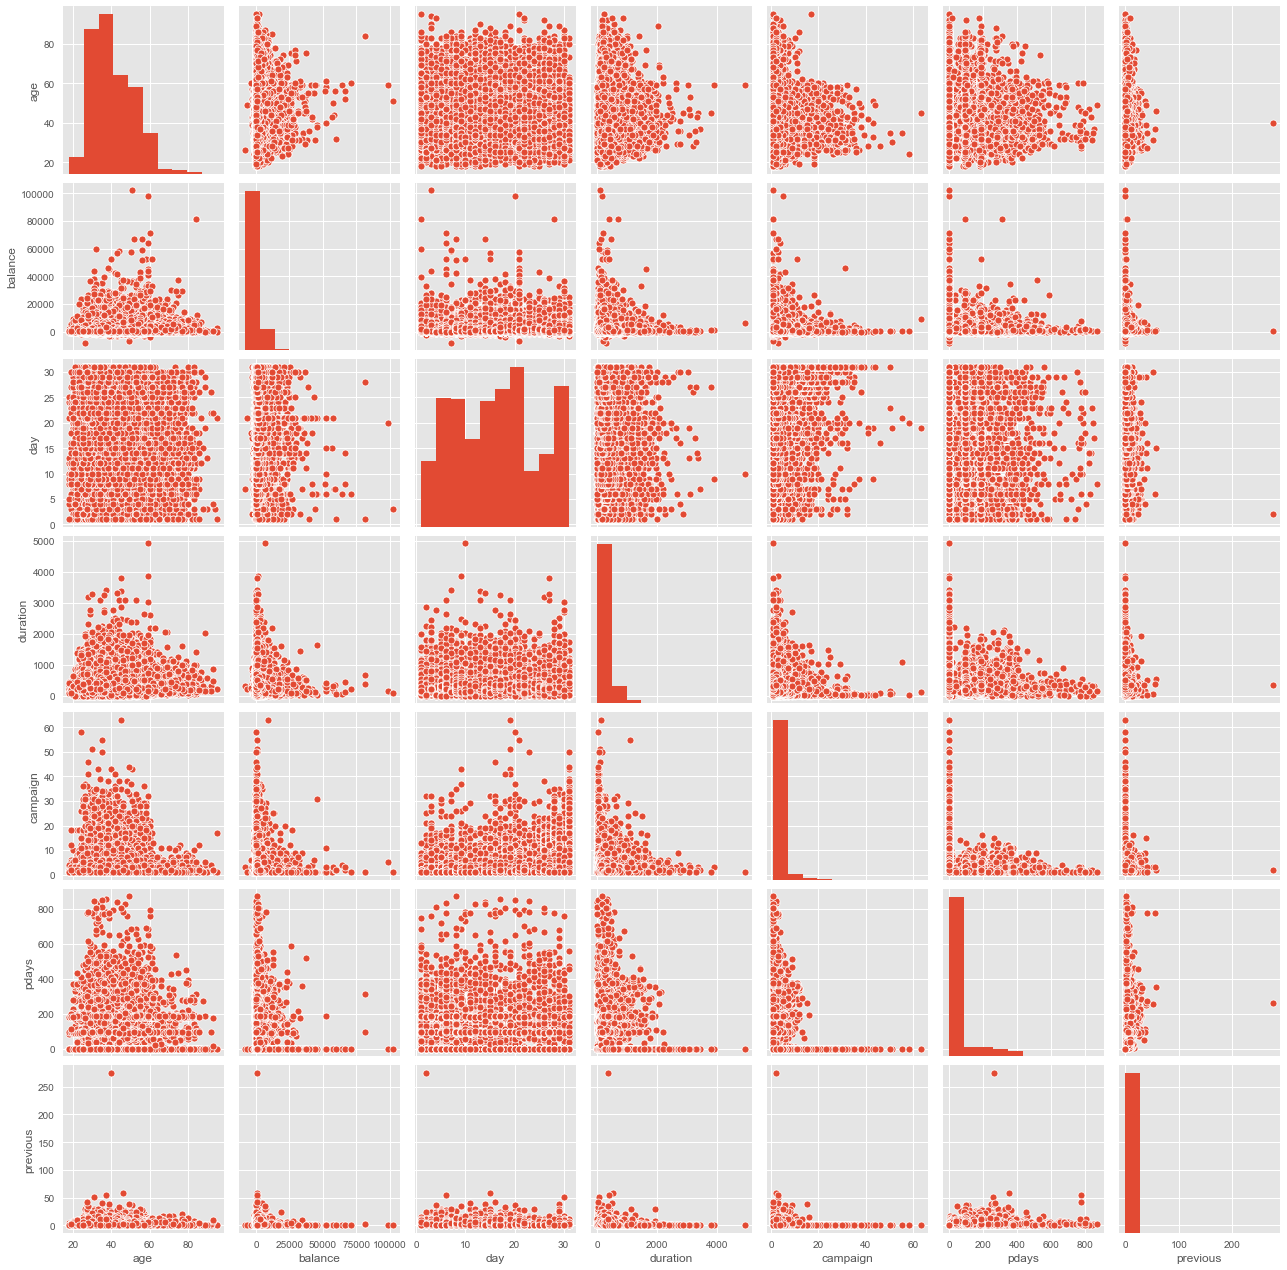

In [20]:
#Pairplot to check for relationships
sns.pairplot(BankData)

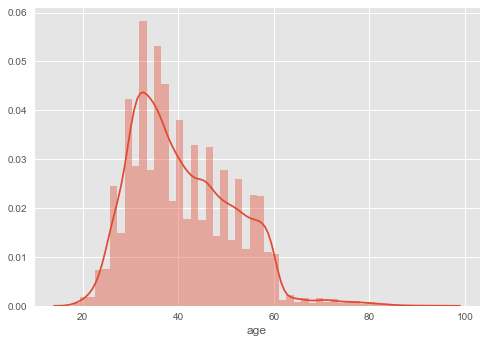

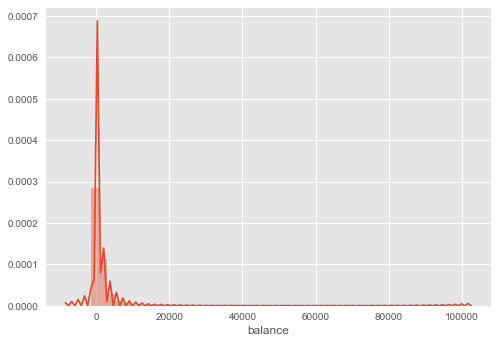

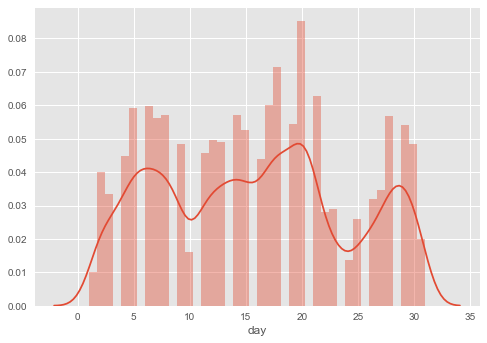

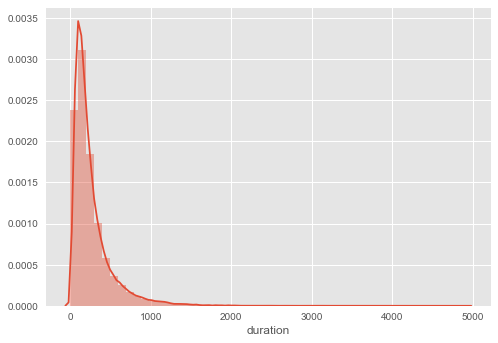

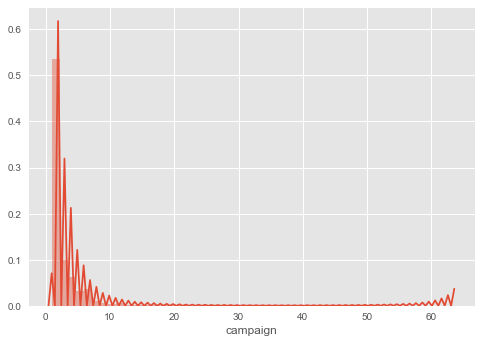

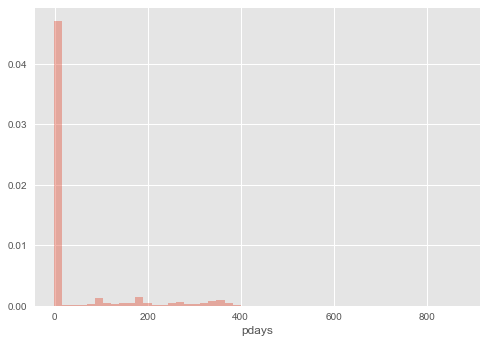

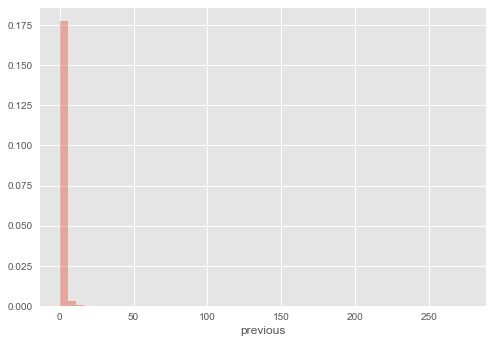

In [21]:
# distplot for continous columns
for i in ['age','balance','day', 'duration', 'campaign', 'pdays', 'previous']:
    sns.distplot(BankData[i])
    plt.show()

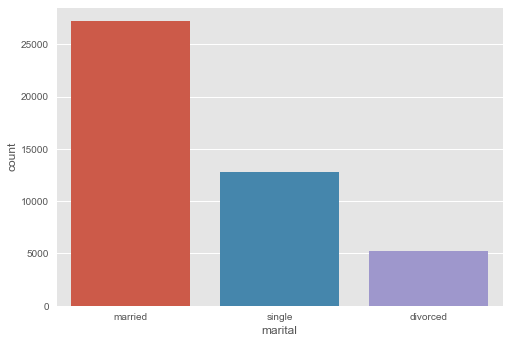

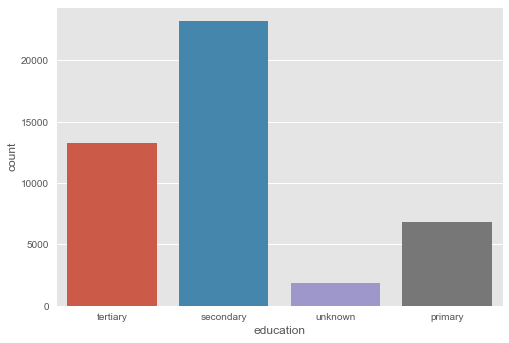

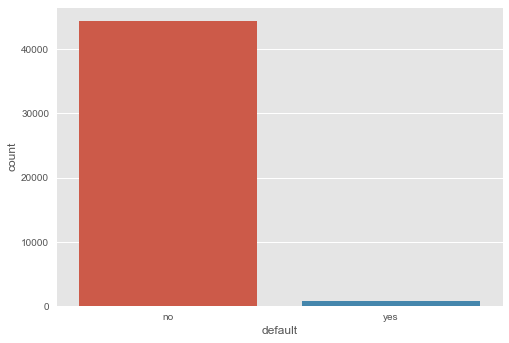

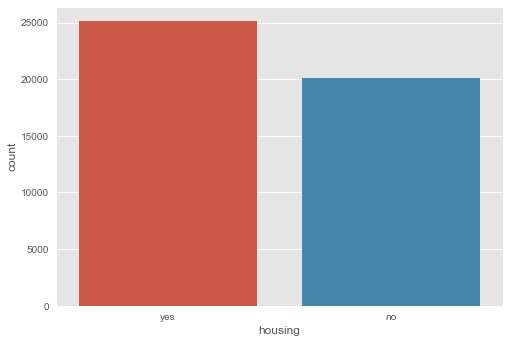

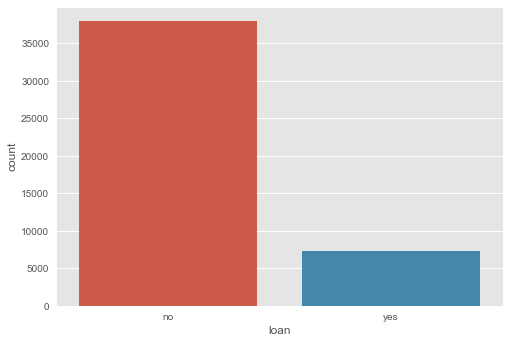

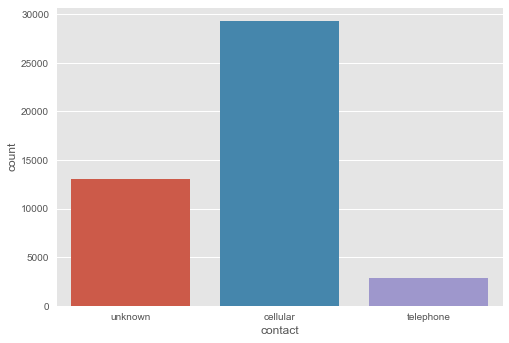

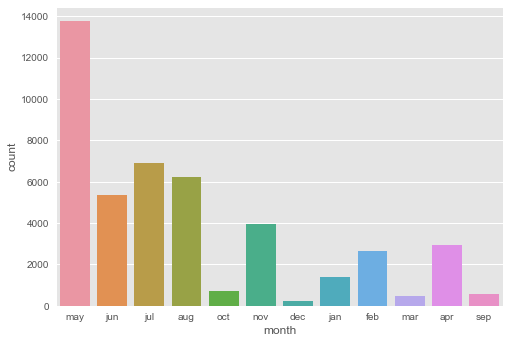

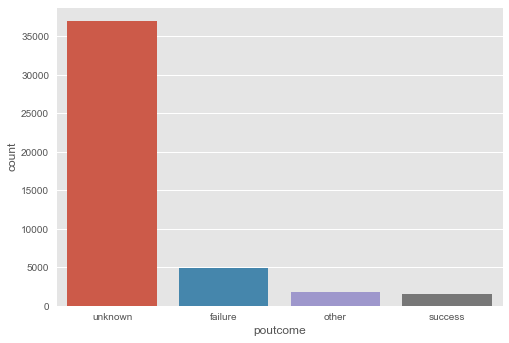

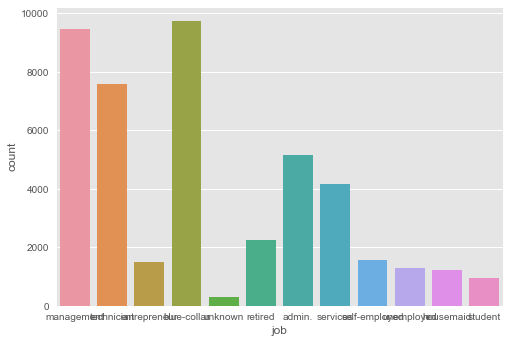

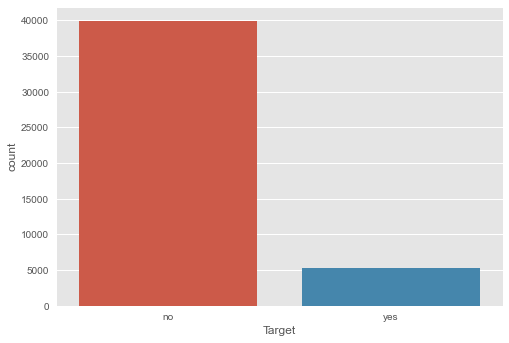

In [22]:
# distplot for continous columns
for i in ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'job', 'Target']:
    sns.countplot(BankData[i])
    plt.show()

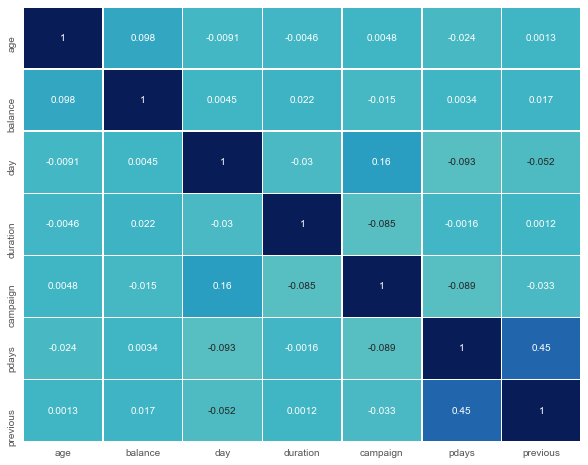

In [23]:
plt.figure(figsize=(10,8))

sns.heatmap(BankData.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

### b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

From the graphs above we can infer that there is no strong correlation between the variables. We can also drop the poutcome column since most entries are unknown. Most bank customers typically maintain a balance below 10k, the majority of customers are contacted in the month of may via cellphone. 

# Deliverable – 2 (Prepare the data for analytics) – (10)

### 1. Ensure the attribute types are correct. If not, take appropriate actions.

for feature in BankData.columns: # Loop through all columns in the dataframe
    if BankData[feature].dtype == 'object': # Only apply for columns with categorical strings
        BankData[feature] = pd.Categorical(BankData[feature])# Replace strings with an integer
BankData.head(10)

### 2. Get the data model ready.

In [24]:
#poutcome will be dropped since it mostly contains "unknown" results which do not have any statistical significance
BankData.drop('poutcome', axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


In [25]:
# This function will assign a 0 or 1 to yes and no answers in the dataframe, this involves using a binary map/ 

yesno =  ['housing', 'loan', 'default', 'Target']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

BankData[yesno] = BankData[yesno].apply(binary_map)

In [26]:
#This function is to convert the months into a number format
def month_converter(month):
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    return months.index(month) + 1

In [27]:
BankData.month = BankData.month.apply(month_converter)
BankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [28]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(BankData[['marital', 'education', 'contact', 'poutcome', 'job']], drop_first=True)

# Adding the results to the master dataframe
BankData = pd.concat([BankData, dummy], axis=1)

In [29]:
BankData.shape

(45211, 38)

In [30]:
BankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#Variable with dummies are being dropped
BankData = BankData.drop(['marital', 'education', 'contact', 'poutcome', 'job'], 1)
BankData.shape

(45211, 33)

### 3. Transform the data i.e. scale / normalize if required

In [32]:
scaler = StandardScaler()
cols = ['age','balance','day','month','duration','campaign', 'pdays', 'previous']
BankData[cols] = scaler.fit_transform(BankData[cols])
BankData.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1.61,0,0.26,1,0,-1.30,-0.48,0.01,-0.57,-0.41,...,0,0,1,0,0,0,0,0,0,0
1,0.29,0,-0.44,1,0,-1.30,-0.48,-0.42,-0.57,-0.41,...,0,0,0,0,0,0,0,1,0,0
2,-0.75,0,-0.45,1,1,-1.30,-0.48,-0.71,-0.57,-0.41,...,1,0,0,0,0,0,0,0,0,0
3,0.57,0,0.05,1,0,-1.30,-0.48,-0.65,-0.57,-0.41,...,0,0,0,0,0,0,0,0,0,0
4,-0.75,0,-0.45,0,0,-1.30,-0.48,-0.23,-0.57,-0.41,...,0,0,0,0,0,0,0,0,0,1


In [33]:
BankData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  float64
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   day                  45211 non-null  float64
 6   month                45211 non-null  float64
 7   duration             45211 non-null  float64
 8   campaign             45211 non-null  float64
 9   pdays                45211 non-null  float64
 10  previous             45211 non-null  float64
 11  Target               45211 non-null  int64  
 12  marital_married      45211 non-null  uint8  
 13  marital_single       45211 non-null  uint8  
 14  education_secondary  45211 non-null  uint8  
 15  education_tertiary   45211 non-null 

### 4. Create the training set and test set in ratio of 70:30

In [34]:
# splitting data into training and test set for independent attributes
features = [col for col in BankData.columns if col != 'Target']

X_train, X_test, Y_train, Y_test = train_test_split(BankData[features], BankData['Target'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 32), (13564, 32))

# Deliverable – 3 (create the ensemble model) – (30)

### 1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

In [35]:
logreg = LogisticRegression (random_state = 7)
logreg.fit(X_train, Y_train)  

LogisticRegression(random_state=7)

In [36]:
#function to predict target variable
Y_predict = logreg.predict(X_test)   

In [37]:
#test to check model score
model_score = logreg.score(X_test, Y_test)
print(model_score)
#based on this score the model has a high model score

0.8992922441757594


In [38]:
#Store the accuracy results for each model in a dataframe for final comparison
lgresultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': model_score})
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Logistic Regression,0.90


In [39]:
#function to show a confusion matrix based on past examples
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9006856890068569

Testing accuracy 0.8992922441757594

Confusion Matrix


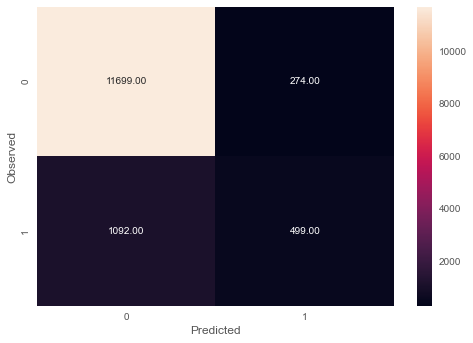

None

Recall: 0.3136392206159648

Precision: 0.6455368693402329

F1 Score: 0.42216582064297803

Roc Auc Score: 0.6453771982141044


In [40]:
#test of models accuracy, recall, precision, F1 and Roc Auc score
print("Trainig accuracy",logreg.score(X_train,Y_train))  
print()
print("Testing accuracy",logreg.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))
print()
print("Recall:",recall_score(Y_test,Y_predict))
print()
print("Precision:",precision_score(Y_test,Y_predict))
print()
print("F1 Score:",f1_score(Y_test,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Y_predict))

In [41]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [42]:
model_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
print("Train: %.2f" % model_entropy.score(X_train, Y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, Y_test))  # performance on test data

Train: 1.00
Test: 0.88


In [44]:
#Decision tree with prunning 
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=1)
clf_pruned.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [45]:
print("Train: %.2f" % clf_pruned.score(X_train, Y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, Y_test))  # performance on test data

Train: 0.88
Test: 0.88


In [46]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(Y_test, preds_test)

In [47]:
# Confusion matrix
pd.crosstab(Y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0
Actual,
0,11973
1,1591


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA3D01B700>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000001BA4006CA30>,
                     model=None)

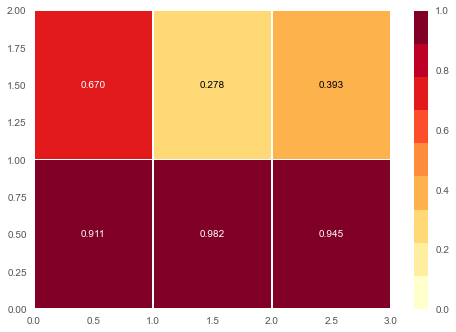

In [48]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA3CD612E0>,
       model=None)

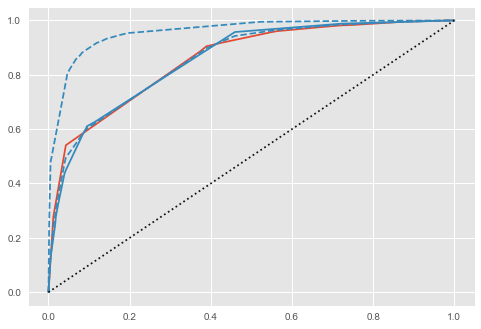

In [49]:
roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc

In [50]:
tempResultsDf = pd.DataFrame({'Method':['Decicion Tree - Entropy'], 'accuracy': [acc_DT]})
lgresultsDf = pd.concat([lgresultsDf, tempResultsDf])
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Logistic Regression,0.90
0,Decicion Tree - Entropy,0.88


In [51]:
#Running a decision tree with gini
model_gini = DecisionTreeClassifier(criterion='entropy')

In [52]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
print("Train: %.2f" % model_gini.score(X_train, Y_train))  # performance on train data
print("Test: %.2f" % model_gini.score(X_test, Y_test))  # performance on test data

Train: 1.00
Test: 0.88


In [54]:
#Decision tree with prunning 
clf_prunedgini = DecisionTreeClassifier(criterion = "gini", max_depth=1)
clf_prunedgini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=1)

In [55]:
print("Train: %.2f" % clf_prunedgini.score(X_train, Y_train))  # performance on train data
print("Test: %.2f" % clf_prunedgini.score(X_test, Y_test))  # performance on test data

Train: 0.88
Test: 0.88


In [56]:
preds_traingini = clf_prunedgini.predict(X_train)
preds_testgini = clf_prunedgini.predict(X_test)

acc_DTgini = accuracy_score(Y_test, preds_test)

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA3CC931C0>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000001BA3CC935B0>,
                     model=None)

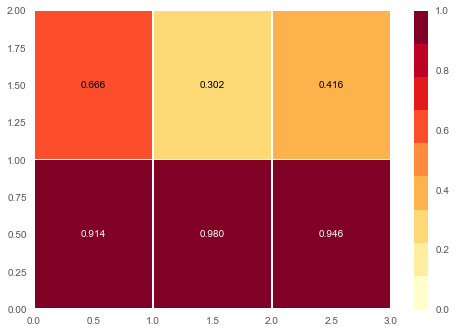

In [57]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "gini", max_depth=4))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA3CA34190>,
       model=None)

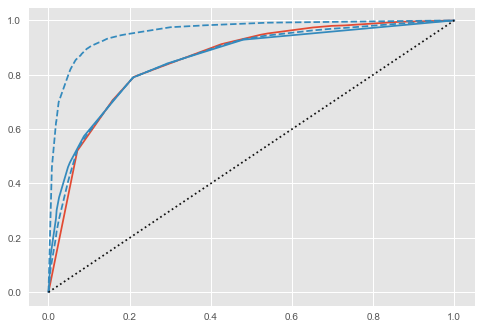

In [58]:
roc = ROCAUC(DecisionTreeClassifier(criterion = "gini", max_depth=4))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc

In [59]:
tempResultsDf = pd.DataFrame({'Method':['Decicion Tree - Gini'], 'accuracy': [acc_DTgini]})
lgresultsDf = pd.concat([lgresultsDf, tempResultsDf])
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Logistic Regression,0.90
0,Decicion Tree - Entropy,0.88
0,Decicion Tree - Gini,0.88


### 2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

In [60]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, Y_train)

In [61]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(Y_test, pred_RF)
print(acc_RF)

0.9029784724270127


In [62]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
lgresultsDf = pd.concat([lgresultsDf, tempResultsDf])
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Logistic Regression,0.90
0,Decicion Tree - Entropy,0.88
0,Decicion Tree - Gini,0.88
0,Random Forest,0.90


In [63]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 50, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, Y_train)

In [64]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(Y_test, pred_AB)
print(acc_AB)

0.8886759068121498


In [65]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
lgresultsDf = pd.concat([lgresultsDf, tempResultsDf])
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Logistic Regression,0.90
0,Decicion Tree - Entropy,0.88
0,Decicion Tree - Gini,0.88
0,Random Forest,0.90
0,Adaboost,0.89


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA38DC0A00>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000001BA38C0DA60>,
                     model=None)

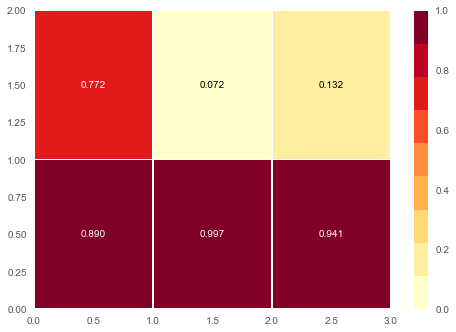

In [66]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 50, learning_rate=0.1, random_state=22))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA3BF5B070>,
       model=None)

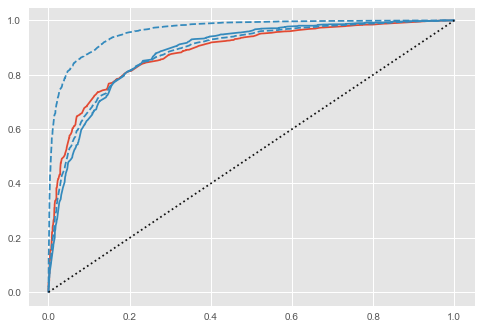

In [67]:
roc = ROCAUC(AdaBoostClassifier(n_estimators= 50, learning_rate=0.1, random_state=22))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc

In [68]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, Y_train)

In [69]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(Y_test, pred_BG)
print(acc_BG)

0.9031259215570628


In [70]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
lgresultsDf = pd.concat([lgresultsDf, tempResultsDf])
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Logistic Regression,0.90
0,Decicion Tree - Entropy,0.88
0,Decicion Tree - Gini,0.88
0,Random Forest,0.90
0,Adaboost,0.89
0,Bagging,0.90


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA3CDDF040>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000001BA3CC11880>,
                     model=None)

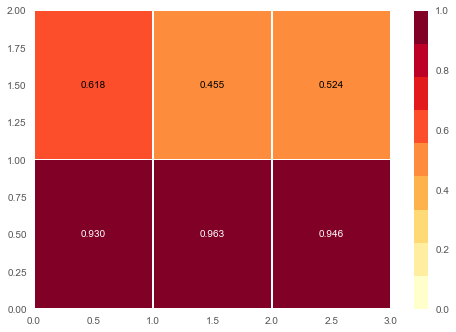

In [71]:
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA3CB23AC0>,
       model=None)

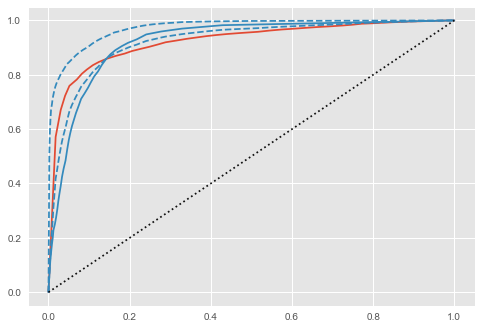

In [72]:
roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc

In [73]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, Y_train)

In [74]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(Y_test, pred_GB)
print(acc_GB)

0.9037157180772634


In [75]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting'], 'accuracy': [acc_GB]})
lgresultsDf = pd.concat([lgresultsDf, tempResultsDf])
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Logistic Regression,0.90
0,Decicion Tree - Entropy,0.88
0,Decicion Tree - Gini,0.88
0,Random Forest,0.90
0,Adaboost,0.89
0,Bagging,0.90
0,Gradient Boosting,0.90


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA3CC5EF70>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000001BA3CC521C0>,
                     model=None)

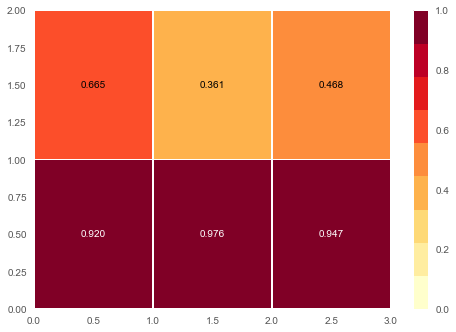

In [76]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA3C9BD6D0>,
       model=None)

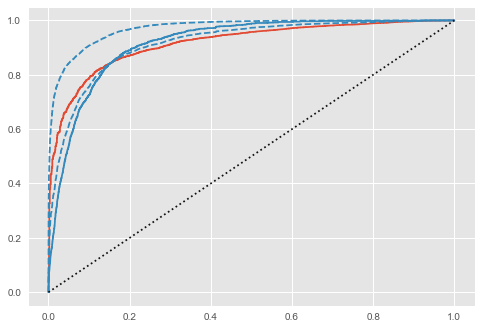

In [77]:
roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc

### 3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

In [78]:
lgresultsDf

,Method,accuracy
0,Logistic Regression,0.90
0,Decicion Tree - Entropy,0.88
0,Decicion Tree - Gini,0.88
0,Random Forest,0.90
0,Adaboost,0.89
0,Bagging,0.90
0,Gradient Boosting,0.90


Based on the results above we can see that there are 4 methods in this case that will provide the highest accuracy. Logistic Regression, Random Forest, Bagging and Gradient Boosting all provide an accuracy rate of 90%. For this specific dataset I will rely on Randome Forest, Bagging and Gradient Boosting and work on improving the results through those methods. 
